# Part I - (Ford Gobike Analysis)
## by (Adeyemi O. Samson)

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area

## Preliminary Wrangling


In [43]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [44]:
# Loading the dataset into Dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [45]:
# Checking the number of rows and columns 
df.shape

(183412, 16)

In [46]:
# Viewing the first five rows of the aataframe 
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [47]:
# Viewing detailed composition of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


## Checking the summary statistics of the dataframe
df.describe()

In [48]:
# value count of the start station names 
df['start_station_name'].value_counts()

Market St at 10th St                                               3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)          3544
Berry St at 4th St                                                 3052
Montgomery St BART Station (Market St at 2nd St)                   2895
Powell St BART Station (Market St at 4th St)                       2760
San Francisco Ferry Building (Harry Bridges Plaza)                 2710
San Francisco Caltrain (Townsend St at 4th St)                     2703
Powell St BART Station (Market St at 5th St)                       2327
Howard St at Beale St                                              2293
Steuart St at Market St                                            2283
The Embarcadero at Sansome St                                      2082
Bancroft Way at Telegraph Ave                                      1796
Bancroft Way at College Ave                                        1770
2nd St at Townsend St                                           

In [49]:
# value count of the end station names 
df['end_station_name'].value_counts()

San Francisco Caltrain Station 2  (Townsend St at 4th St)          4857
Market St at 10th St                                               3973
Montgomery St BART Station (Market St at 2nd St)                   3647
San Francisco Ferry Building (Harry Bridges Plaza)                 3368
Powell St BART Station (Market St at 4th St)                       2997
San Francisco Caltrain (Townsend St at 4th St)                     2947
Berry St at 4th St                                                 2872
The Embarcadero at Sansome St                                      2512
Powell St BART Station (Market St at 5th St)                       2353
Steuart St at Market St                                            2338
Howard St at Beale St                                              2034
Civic Center/UN Plaza BART Station (Market St at McAllister St)    1865
Bancroft Way at Telegraph Ave                                      1814
Beale St at Harrison St                                         

In [50]:
# checking the numbers of NAN value
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [51]:
# checking number of duplicates
df.duplicated().sum()

0

### What is the structure of your dataset?

> The Dataset consists of information regarding 183412 bike trips, including its timing. It consist of 183412 rows and 16 columns. The dataset 201902-fordgobike-tripdata.csv was provided by Udacity. Each trip includes:
    * Duration in seconds
    * Start Time and Date
    * End Time and Date
    * Start Station id
    * Start Station Name
    * Start Station Latitude
    * Start Station Longitude
    * End Station id
    * End Station Name
    * End Station Latitude
    * End Station Longitude
    * Bike id
    * User Type
    * Member Birth Year
    * Member Gender
    * Bike Share for all Trip



### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest include 
    * It the average duration of the bike trip depends on whether the user is a subscriber or not?
    * What is the most popular bike station destination as its relates to the user_type?
    * When are most trip taken as its relates to hour of the day and days of the week?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here!
    * start_time
    * duration_sec
    * end_station_name
    * user_type

##  Identifying Quality and Tidiness Issues

#### Quality Issue
> 
    * start_time and endtime have the wrong datatype object (instead of datetime)
    * start_station_id has wong datatype float64 (instead of str)
    * user_type has wrong datatype object (instead of categorical)

#### Tidiness
> 
    * start_station_id, start_station_name, end_station_id & end_station_name have 197 NaN Values
    * member_birth_year and member_gender have 8265 Null values

In [52]:
# Removing the  member_birth_year and member_gender columns
df = df.drop(['member_birth_year', 'member_gender'], axis=1)

In [53]:
# changing the user type datatype to catigorical
df['user_type'] = df['user_type'].astype('category')

In [54]:
df = df.dropna()

In [55]:
# Chnaging the star time and end time to datetime datatype
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df = df.sort_values(by='start_time')

In [56]:
# Extracting mins, days, weeks and months from the start time column
df['start_date'] = df.start_time.dt.strftime('%Y-%m-%d')
df['start_hour_of_day'] = df.start_time.dt.strftime('%H')
df['start_day_of_week'] = df.start_time.dt.strftime('%A')
df['start_month'] = df.start_time.dt.strftime('%b')
df['year_month'] = df['start_time'].dt.to_period('M')


In [57]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,start_date,start_hour_of_day,start_day_of_week,start_month,year_month
183411,271,2019-02-01 00:00:20.636,2019-02-01 00:04:52.058,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,No,2019-02-01,00,Friday,Feb,2019-02
183406,706,2019-02-01 00:04:40.616,2019-02-01 00:16:27.080,138.0,Jersey St at Church St,37.750900,-122.427411,78.0,Folsom St at 9th St,37.773717,-122.411647,5017,Subscriber,No,2019-02-01,00,Friday,Feb,2019-02
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,No,2019-02-01,00,Friday,Feb,2019-02
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,No,2019-02-01,00,Friday,Feb,2019-02
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,No,2019-02-01,00,Friday,Feb,2019-02


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 183411 to 15
Data columns (total 19 columns):
duration_sec               183215 non-null int64
start_time                 183215 non-null datetime64[ns]
end_time                   183215 non-null datetime64[ns]
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183215 non-null float64
start_station_longitude    183215 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183215 non-null float64
end_station_longitude      183215 non-null float64
bike_id                    183215 non-null int64
user_type                  183215 non-null category
bike_share_for_all_trip    183215 non-null object
start_date                 183215 non-null object
start_hour_of_day          183215 non-null object
start_day_of_week          183215 non-null object
start_month     

In [59]:
df.start_day_of_week.value_counts()

Thursday     35176
Tuesday      31781
Wednesday    29609
Friday       28962
Monday       26807
Sunday       15503
Saturday     15377
Name: start_day_of_week, dtype: int64

In [60]:
df.start_month.value_counts()

Feb    183215
Name: start_month, dtype: int64

In [61]:
# Creating duration in minute column from duration in second column
df['duration_min'] = df['duration_sec']/60

## Univariate Exploration

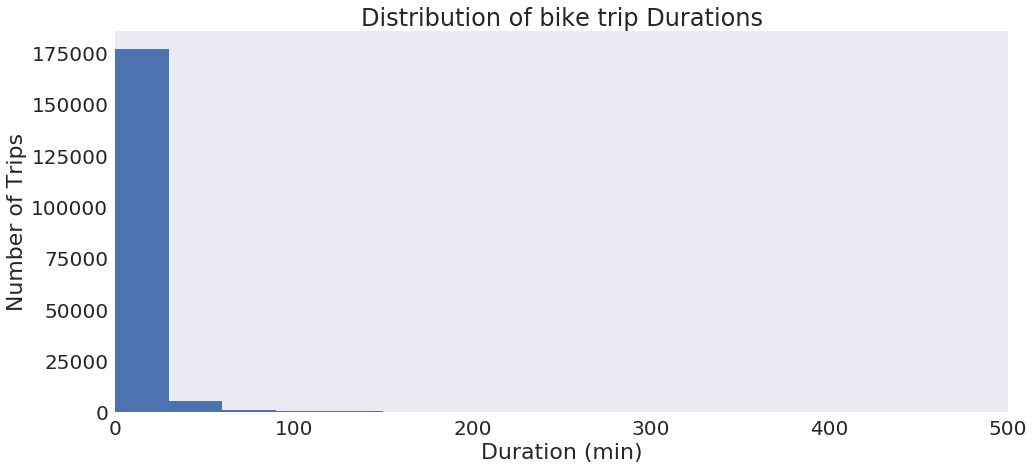

In [62]:
# Histogram displaying the trip in minutes
binsize = 30
bins = np.arange(0, df['duration_min'].max(0)+1, binsize)

plt.figure(figsize=[16, 7])
plt.hist(data = df, x = 'duration_min', bins = bins)
plt.title('Distribution of bike trip Durations')
plt.xlabel('Duration (min)')
plt.ylabel('Number of Trips')
plt.xlim((0, 500))
plt.show()

In [63]:
# Mean of the trip duration in min
print('The mean of the trip distribution is ', df.duration_min.mean(), 'Minutes')

The mean of the trip distribution is  12.0983669459 Minutes


In [64]:
# Median of the trip duration in min
print('The median of the trip distribution is ', df.duration_min.median(), 'Minutes')

The median of the trip distribution is  8.56666666667 Minutes


In [65]:
# Mode of the trip duration in min
print('The mode of the trip distribution is ', df.duration_min.mode(), 'Minutes')

The mode of the trip distribution is  0    4.533333
dtype: float64 Minutes


#### The tail of the distribution seems to be long let put it in log scale

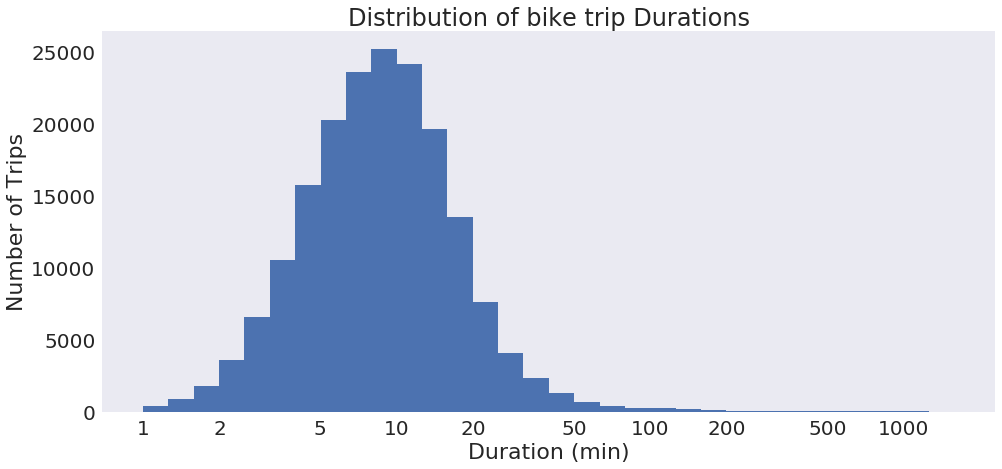

In [66]:
# Plot of Distribution of Bike trip Duration
log_binsize = 0.1
bins_log = 10 ** np.arange(0.0, np.log10(df['duration_min'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[16, 7])
plt.hist(data = df, x = 'duration_min', bins = bins_log)
plt.title('Distribution of bike trip Durations')
plt.xlabel('Duration (min)')
plt.ylabel('Number of Trips')
plt.xscale('log')
tick_locs = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
plt.xticks(tick_locs, tick_locs)
plt.show()


> Duration has a long tailed distribution with significant number of rides taking longer than 200 minutes. When plotted on a log-scale, the duration distribution looks roughly bell-shaped, with one peak between 9 and 10. Most of the bike trips lasts between 9 and 16 minutes. There are not a lot of bike trips that lasted less than 2 minutes and over 50 minutes.


In [67]:
df.duration_min.describe()

count    183215.000000
mean         12.098367
std          29.917978
min           1.016667
25%           5.416667
50%           8.566667
75%          13.266667
max        1424.066667
Name: duration_min, dtype: float64

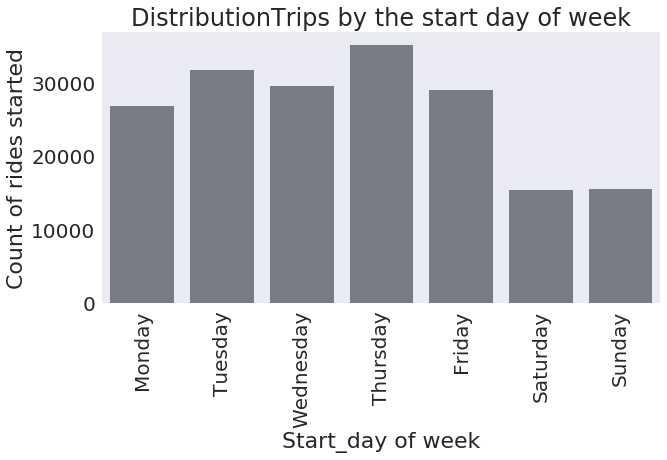

In [68]:
# Plot of Trip distrubution by days of the Week
sb.set(rc={'figure.figsize':(10,5)}, font_scale=2)
plt.rcParams['axes.grid'] = False
plt.xticks(rotation=90)

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df['start_day_of_week'] = df['start_day_of_week'].astype(weekdaycat)

sb.countplot(data=df, x='start_day_of_week', saturation = 0.1, color=sb.color_palette()[0])
plt.xlabel('Start_day of week')
plt.ylabel('Count of rides started')
plt.title("DistributionTrips by the start day of week");

> Thursday have the highest number of trip rides in the week

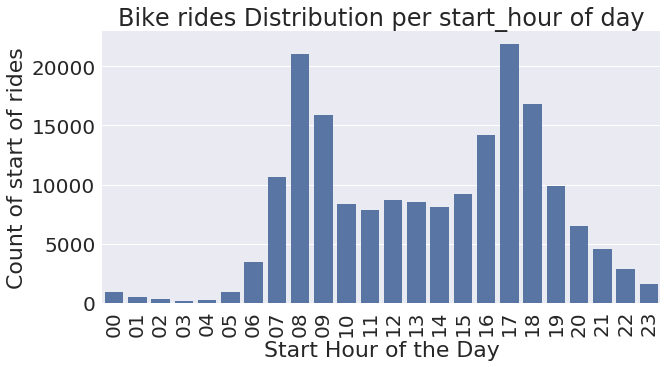

In [75]:
# A plot of the distribution of the of ride per start hour of Day
sb.set(rc={'figure.figsize':(10,5)}, font_scale=2)
plt.rcParams['axes.grid'] = True
plt.xticks(rotation=90)
sb.set_style("whitegrid")
sb.countplot(data=df, x='start_hour_of_day', color=sb.color_palette()[0])
plt.xlabel('Start Hour of the Day')
plt.ylabel('Count of start of rides')
plt.title('Bike rides Distribution per start_hour of day');

> The most busy hour falls around 8AM in the morning  and 5PM in the evening. We have over 20,000 of count of ride around the period of 8Am and 5PM 

#### User Type Distribution:

In [76]:
df.user_type.value_counts()

Subscriber    163414
Customer       19801
Name: user_type, dtype: int64

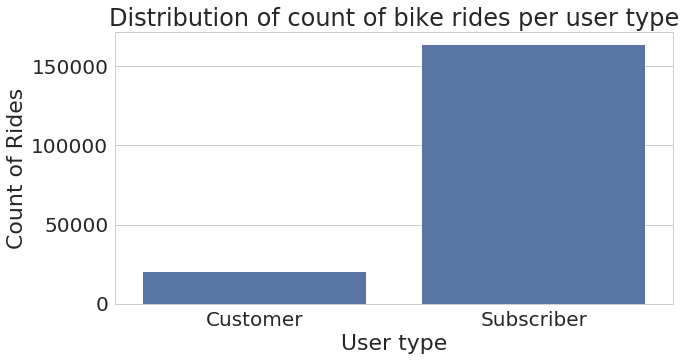

In [77]:
# Chart of the user type distribution using countplot
sb.set(rc={'figure.figsize':(10,5)}, font_scale=2)
plt.rcParams['axes.grid'] = True
sb.set_style("whitegrid")
sb.countplot(data=df, x='user_type', color=sb.color_palette()[0])
plt.xlabel('User type')
plt.ylabel('Count of Rides')
plt.title('Distribution of count of bike rides per user type');

### Almost 97% of the user type are subscribers

### Trip distribution count to favorite end station names

In [78]:
# Trip distribution to the top 10 destinations:
top_ten_dest = df['end_station_name'].value_counts().index[:10]

In [79]:
# Inserting top 10 end station distination into dataframe
top_dest = df.loc[df['end_station_name'].isin(top_ten_dest)]
top_dest.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,start_date,start_hour_of_day,start_day_of_week,start_month,year_month,duration_min
183399,958,2019-02-01 00:12:24.247,2019-02-01 00:28:22.738,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,58.0,Market St at 10th St,37.776619,-122.417385,3392,Subscriber,No,2019-02-01,00,Friday,Feb,2019-02,15.966667
183400,250,2019-02-01 00:23:52.611,2019-02-01 00:28:02.679,356.0,Valencia St at Clinton Park,37.769188,-122.422285,58.0,Market St at 10th St,37.776619,-122.417385,4962,Subscriber,No,2019-02-01,00,Friday,Feb,2019-02,4.166667
183388,490,2019-02-01 00:39:53.112,2019-02-01 00:48:03.338,61.0,Howard St at 8th St,37.776513,-122.411306,81.0,Berry St at 4th St,37.775880,-122.393170,5411,Subscriber,No,2019-02-01,00,Friday,Feb,2019-02,8.166667
183378,659,2019-02-01 00:53:36.143,2019-02-01 01:04:35.371,47.0,4th St at Harrison St,37.780955,-122.399749,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,4960,Subscriber,No,2019-02-01,00,Friday,Feb,2019-02,10.983333
183335,927,2019-02-01 02:08:44.240,2019-02-01 02:24:12.014,133.0,Valencia St at 22nd St,37.755213,-122.420975,58.0,Market St at 10th St,37.776619,-122.417385,5166,Subscriber,No,2019-02-01,02,Friday,Feb,2019-02,15.450000


In [80]:
top_dest.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,start_date,start_hour_of_day,start_day_of_week,start_month,year_month,duration_min
81,294,2019-02-28 23:15:21.113,2019-02-28 23:20:15.798,356.0,Valencia St at Clinton Park,37.769188,-122.422285,58.0,Market St at 10th St,37.776619,-122.417385,5938,Subscriber,No,2019-02-28,23,Thursday,Feb,2019-02,4.900000
65,926,2019-02-28 23:17:05.853,2019-02-28 23:32:32.682,13.0,Commercial St at Montgomery St,37.794231,-122.402923,81.0,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,No,2019-02-28,23,Thursday,Feb,2019-02,15.433333
66,457,2019-02-28 23:23:32.035,2019-02-28 23:31:09.406,345.0,Hubbell St at 16th St,37.766483,-122.398279,81.0,Berry St at 4th St,37.775880,-122.393170,6132,Subscriber,No,2019-02-28,23,Thursday,Feb,2019-02,7.616667
45,717,2019-02-28 23:33:21.095,2019-02-28 23:45:18.510,9.0,Broadway at Battery St,37.798572,-122.400869,58.0,Market St at 10th St,37.776619,-122.417385,6581,Subscriber,No,2019-02-28,23,Thursday,Feb,2019-02,11.950000
26,385,2019-02-28 23:49:24.399,2019-02-28 23:55:50.284,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,6531,Customer,No,2019-02-28,23,Thursday,Feb,2019-02,6.416667


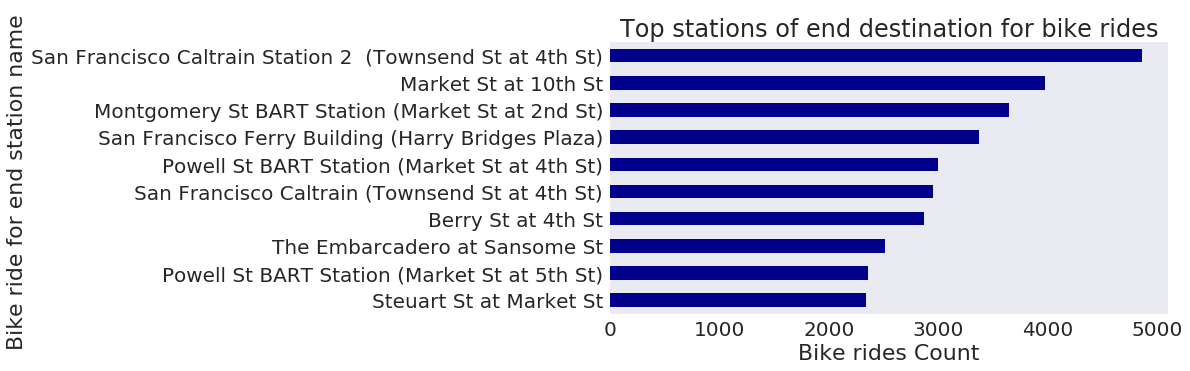

In [81]:
sb.set(rc={'figure.figsize':(10,5)}, font_scale=2)
plt.rcParams['axes.grid'] = False

top_dest['end_station_name'].value_counts().sort_values(ascending=True).plot(kind='barh',color='darkblue');
plt.title('Top stations of end destination for bike rides')
plt.xlabel('Bike rides Count')
plt.ylabel('Bike ride for end station name ');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> 
    * large range of values was taken by the bike duration variable. The data looked bell-shape under the log transformation with one peak between 9 and 10Min.
    * we can see that the number of trip is averagly double during the week days while Thursdays have the highest number of trips follow by tuesdays and friday

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Several variables were converted to the correct datatype (i.e the start_time, end_time and user_type). And new variable was created from the start_time colunms(start_date, start_hour_of_day, start_day_of_week, start_month and year_month) to be able to create plot of different time, days and weeks
     

## Bivariate Exploration

#### Realtionship between duration minutes and user type

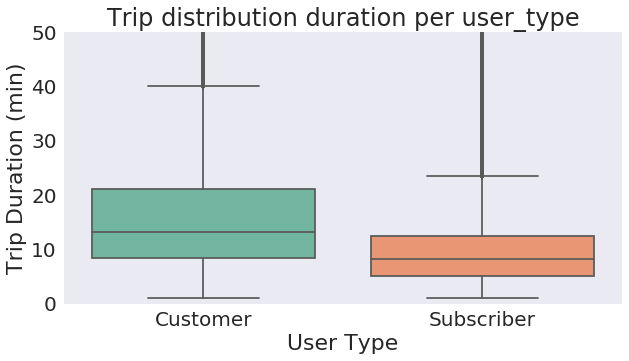

In [82]:
sb.set(rc={'figure.figsize':(10,5)}, font_scale=2)
plt.rcParams['axes.grid'] = False
sb.boxplot(x='user_type', y='duration_min', data = df, palette ='Set2')
plt.title('Trip distribution duration per user_type')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (min)')
plt.ylim((0, 50))
plt.show()

#### The two distributions chart above indicates that Subscribers typically have shorter bike trips with the peak at 10-13mins while the Customers have thier at 20mins

(-20, 100)

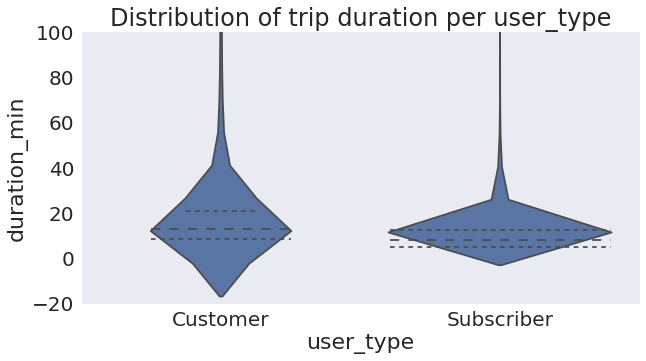

In [83]:
sb.set(rc={'figure.figsize':(10,5)}, font_scale=2)
plt.rcParams['axes.grid'] = False

# violinplot
ax1 = sb.violinplot(data = df, x = 'user_type', y = 'duration_min', inner='quartile', color = sb.color_palette()[0])       
            # WE set THE  inner = 'quartile' BECAUSE the three lines will be plotted within each violin area for the three middle quartiles. 
            # The thick dashes line indicates the median, and the two lines shorter dashes on either side indicate the first and third quartiles.
plt.xticks()             
plt.title('Distribution of trip duration per user_type')
plt.ylim((-20, 100))

#### The violinplot shows that the that third quartile of Subscribers (13 min) is even below the median of the Customers distribution (15 min)

### Comparing the user types in respect to day of the week and hour of day

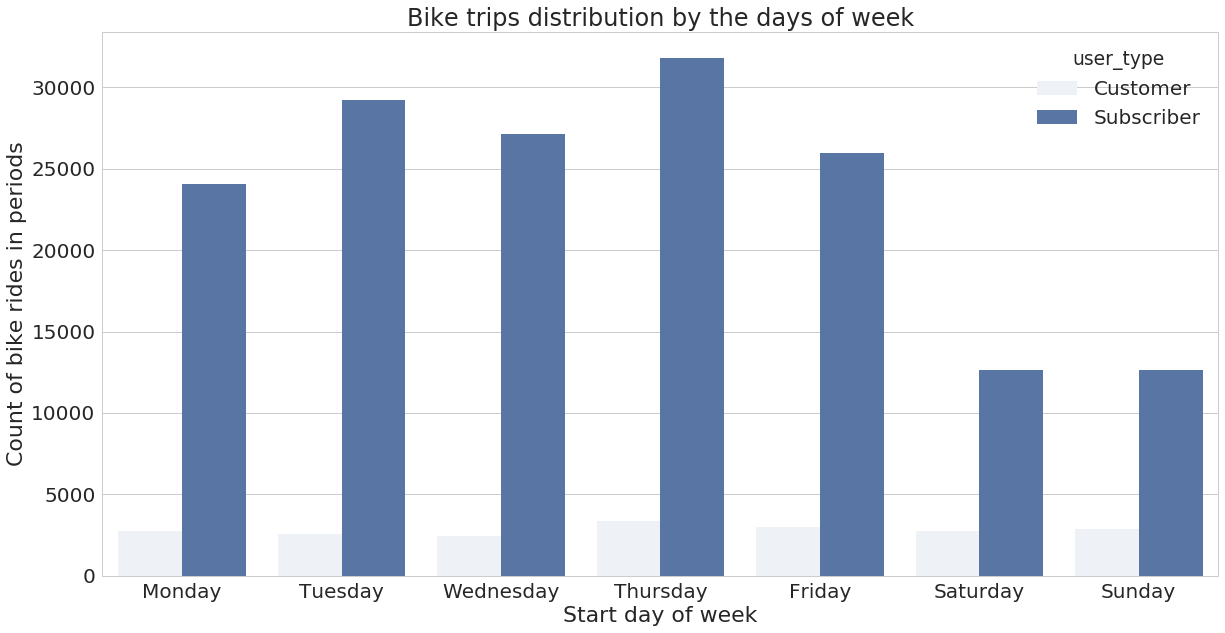

In [94]:
# A plot of Distribution of bike trip by start day of week base on the user type

sb.set(rc={'figure.figsize':(20,10)}, font_scale=2)
plt.rcParams['axes.grid'] = True
sb.set_style("whitegrid")
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df['start_day_of_week'] = df['start_day_of_week'].astype(weekdaycat)

sb.countplot(data=df, x='start_day_of_week', hue='user_type',color=sb.color_palette()[0])
plt.xlabel('Start day of week')
plt.ylabel('Count of bike rides in periods')
plt.title("Bike trips distribution by the days of week");

> * The number of subscriber that hire bike during week days is more than triple that of the customer 

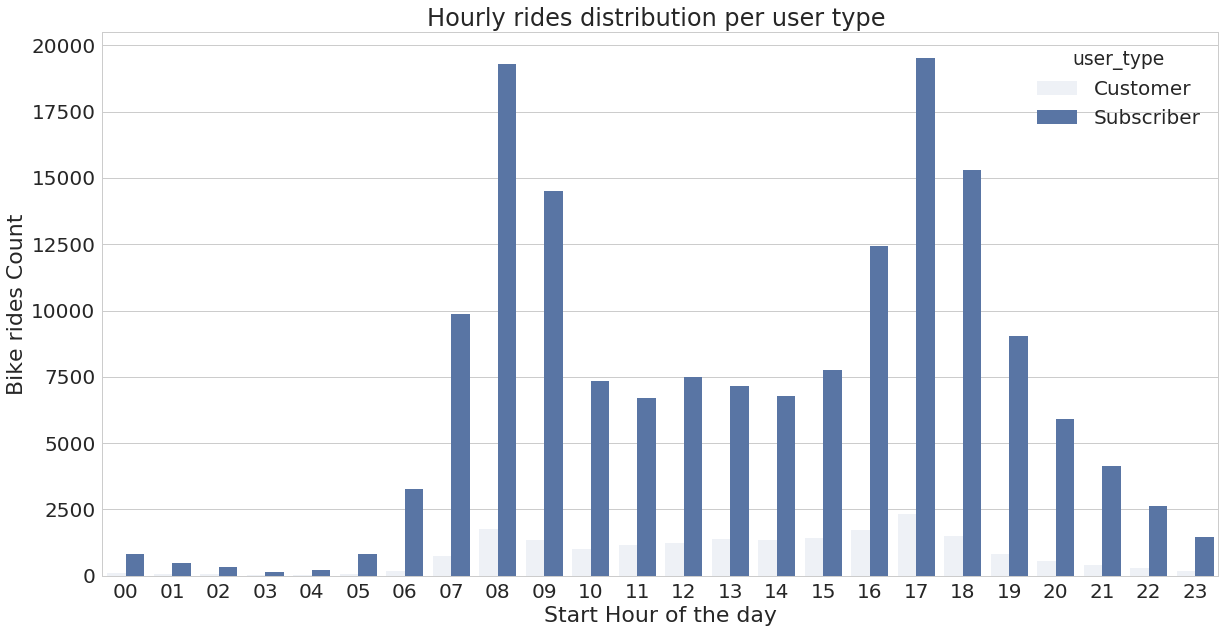

In [86]:
# Daily bike distribution count between the subscriber and customer

sb.set(rc={'figure.figsize':(20,10)}, font_scale=2)
plt.rcParams['axes.grid'] = True
sb.set_style("whitegrid")
sb.countplot(data=df, x='start_hour_of_day', hue='user_type', color=sb.color_palette()[0])
plt.xlabel('Start Hour of the day')
plt.ylabel('Bike rides Count')
plt.title('Hourly rides distribution per user type ');

> * The customer and subscriber have thier busy hour almost during thesame time of the day

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> 
    * The two distributions chart above indicates that Subscribers typically have shorter bike trips with the peak at 6-10mins while the Customers have thier at 23mins
    * The violinplot shows that the that third quartile of Subscribers (13 min) is even below the median of the Customers distribution (15 min)
    * The number of subscriber that hire bike during week days is more than triple that of the customer

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> it seems thier is a relation between the time taken to complete a trip and the starting hour of the trip. it will be interesting to explore the rationship between user type, duration and station name


## Multivariate Exploration

### Exploring the user type as related to week and duration in minutes

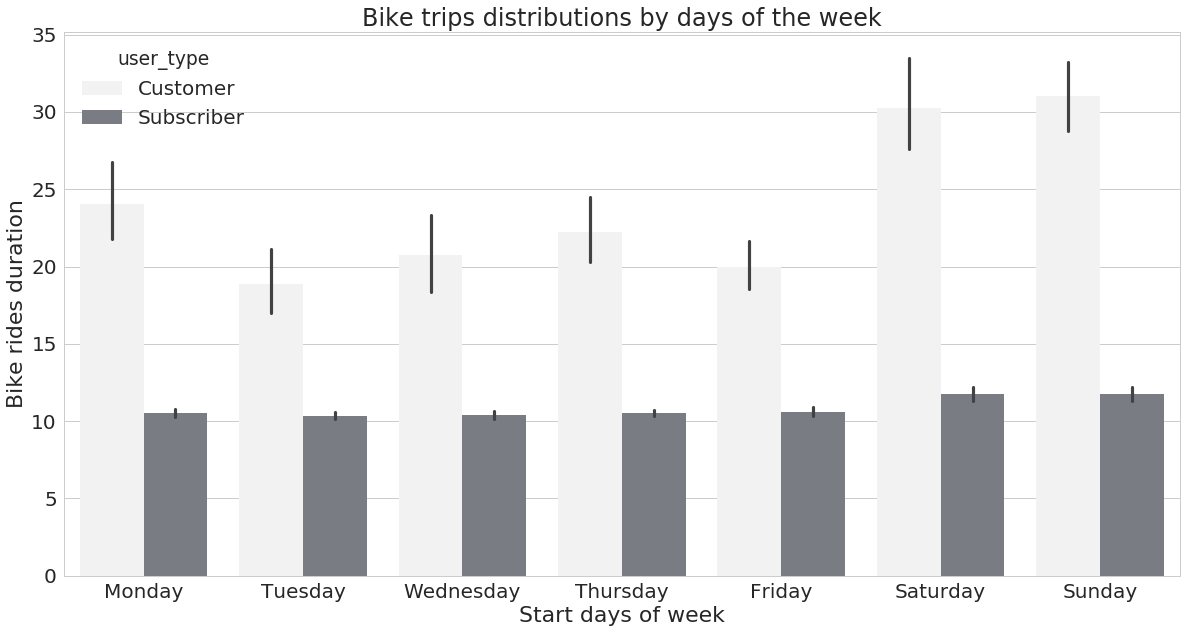

In [92]:
# Plot of relationship between start days of the week, duration and user type
sb.set(rc={'figure.figsize':(20,10)}, font_scale=2)
plt.rcParams['axes.grid'] = True

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(categories=weekday, ordered=True)
df['start_day_of_week'] = df['start_day_of_week'].astype(weekdaycat)

sb.set_style("whitegrid")
sb.barplot(data=df, x='start_day_of_week', y='duration_min', hue='user_type', saturation = 0.1, color= sb.color_palette()[0])
plt.xlabel('Start days of week')
plt.ylabel('Bike rides duration')
plt.title("Bike trips distributions by days of the week");

> 
* Their is a significant higher trip duration by Customer during week days. Most of these trips happens during weekends when most people are not at work

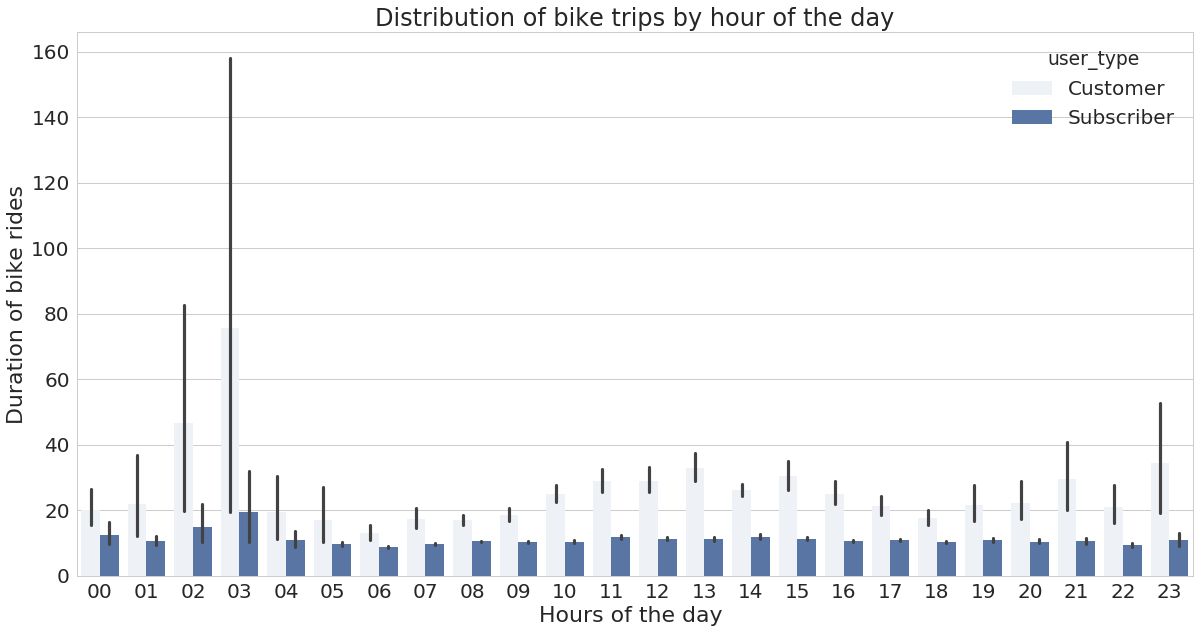

In [89]:
# Plot of relationship between hours of the day, duration  and user type
sb.set(rc={'figure.figsize':(20,10)}, font_scale=2)
plt.rcParams['axes.grid'] = True

sb.set_style("whitegrid")
sb.barplot(data=df, x='start_hour_of_day', y='duration_min', hue='user_type', color = sb.color_palette()[0])
plt.xlabel('Hours of the day ')
plt.ylabel('Duration of bike rides')
plt.title("Distribution of bike trips by hour of the day");

> * The trip duration as both high and low movement with respect to the hour at 3 o'clock. And thier seems to be a dip at 6 and 8 o'clock for both user types

#### Analysing how does the hourly usage varies between customers and subscriber with respect to days of the week

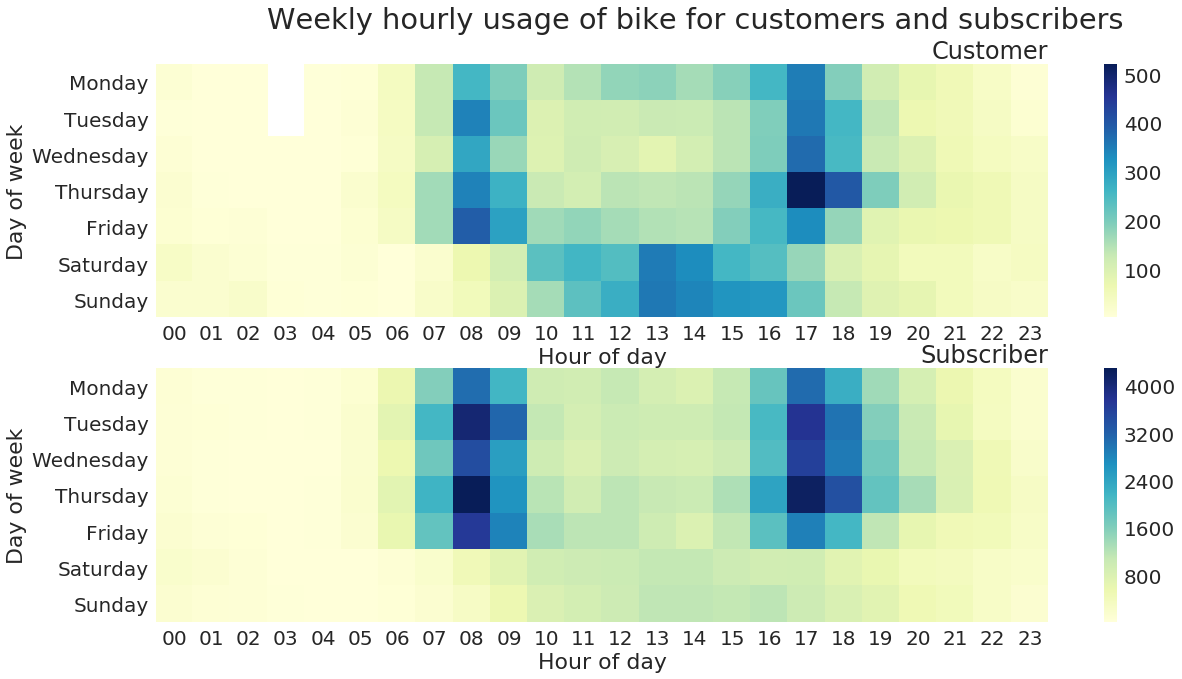

In [96]:
# A plot of relationship between customer, start day of week, start hour of week and Subscriber 
sb.set(rc={'figure.figsize':(20,10)}, font_scale=2)
plt.rcParams['axes.grid'] = True
sb.set_style("whitegrid")

plt.subplot(2, 1, 1)
customers = df.query('user_type == "Customer"')
cust_week_hour = customers.groupby(['start_day_of_week', 'start_hour_of_day']).size().reset_index(name='count')
cust_week_hour = cust_week_hour.pivot(index='start_day_of_week', columns='start_hour_of_day', values='count')
sb.heatmap(cust_week_hour, cmap="YlGnBu");
plt.title('Customer', loc='right');
plt.xlabel('Hour of day');
plt.ylabel('Day of week');

plt.subplot(2, 1, 2)
subscribers = df.query('user_type == "Subscriber"')
sub_week_hour = subscribers.groupby(['start_day_of_week', 'start_hour_of_day']).size().reset_index(name='count')
sub_week_hour = sub_week_hour.pivot(index='start_day_of_week', columns='start_hour_of_day', values='count')
sb.heatmap(sub_week_hour, cmap="YlGnBu");
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of day');
plt.ylabel('Day of week');

plt.subplots_adjust(top=0.9)
plt.suptitle('Weekly hourly usage of bike for customers and subscribers');

> * The pivot table indicates and strenthen the result of the of our bivariate exploration that shows different usage patterns. Customers and Subscriber do have their peak almost during thesame our of the day. But customer tend to use the bike service mostly on weekends(Saturday/Sunday) from 9AM to 6PM. While Subscriber have thier trip from Monday to Friday by 6AM-9AM And by 4PM- 7PM 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Their is a significant higher trip duration by Customer during week days. Most of these trips happens during weekends when most people are not at work

> The trip duration as both high and low movement with respect to the hour at 3 o'clock. And thier seems to be a dip at 6 and 8 o'clock for both user types

> The pivot table indicates and strenthen the rsult of the of our bivariate exploration that shows different usage patterns. Customers and Subscriber do have their peak almost during thesame our of the day. But customer tend to use the bike service mostly on weekends(Saturday/Sunday) from 9AM to 6PM. While Subscriber have thier trip from Monday to Friday by 6AM-9AM And by 4PM- 7PM

### Were there any interesting or surprising interactions between features?

> Thier is almost thesame reaction for both users that depends mostly on the hour of the day and days of the week 

## Conclusions
> This data set consist information of 183412 individual rides made in Ford GoBike sharing system covering. i was able to deduce the trip pettern of different users base on their types in realtion to hour of usage and level of patronage. Subscriber makes a lot of trips than customers. subsciber takes most of their trips during early hours of week days and Customer took theirs weekend.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!



## References:
> https://seaborn.pydata.org/generated/seaborn.countplot.html

>https://www.geeksforgeeks.org/countplot-using-seaborn-in-python/

> https://pandas.pydata.org/docs/reference/api/pandas.api.types.union_categoricals.html

> https://stackoverflow.com/questions/36341484/get-day-name-from-weekday-int